# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [ ]:
# Importar librerías o dependencias

import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io

# Descargar HTML

url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
response = requests.get(url)

print(response.status_code)
print(response.text)


200
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-cont

In [ ]:
# Transformar el HTML en dataframe

html = io.StringIO(response.text)
tables = pd.read_html(html)

print(f"Número de tablas: {len(tables)}")

Número de tablas: 27


In [ ]:
# Obtener el DataFrame

df = tables[0]
df.head()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.897,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.421,6 January 2017,[3]
2,3,"""Starboy""",The Weeknd and Daft Punk,3.956,21 September 2016,[4]
3,4,"""Someone You Loved""",Lewis Capaldi,3.947,8 November 2018,[5]
4,5,"""As It Was""",Harry Styles,3.936,1 April 2022,[6]


In [ ]:
# Procesar el DataFrame:

df.drop(columns="Ref.", inplace=True)
df.drop(index=df.index[-1], inplace=True)
df['Streams (billions)'] = df['Streams (billions)'].astype(float)
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
df['Rank'] = df['Rank'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                99 non-null     int64         
 1   Song                99 non-null     object        
 2   Artist(s)           99 non-null     object        
 3   Streams (billions)  99 non-null     float64       
 4   Release date        99 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ KB


In [14]:
#Almacenar datos en SQLITE

conn = sqlite3.connect("spotify_top_songs.db") 

df.to_sql("most_streamed", conn, if_exists="replace", index=False)
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM most_streamed")
print("Rows inserted:", cursor.fetchone()[0])

conn.commit()
conn.close()

Rows inserted: 99


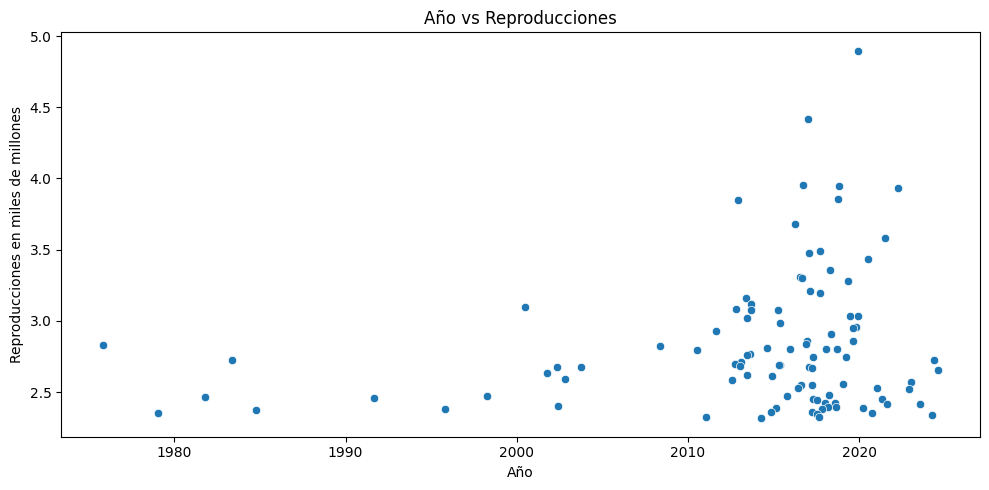

In [16]:
# Visualizaciones

plt.figure(figsize=(10,5))
sns.scatterplot(df,x="Release date",y="Streams (billions)")
plt.title("Año vs Reproducciones")
plt.xlabel("Año")
plt.ylabel("Reproducciones en miles de millones")
plt.tight_layout()
plt.show()

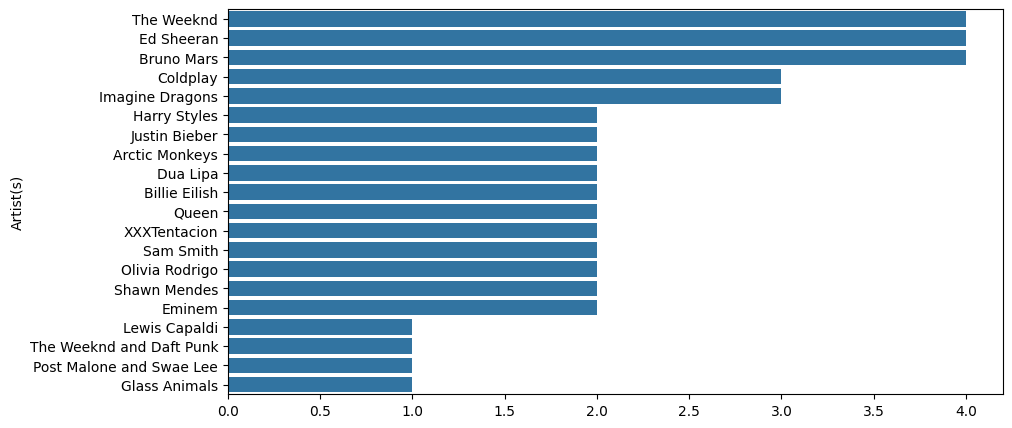

In [17]:
n_canciones_x_artista = df["Artist(s)"].value_counts().nlargest(20)

plt.figure(figsize=(10,5))
sns.barplot(x=n_canciones_x_artista.values,y=n_canciones_x_artista.index)
plt.show()

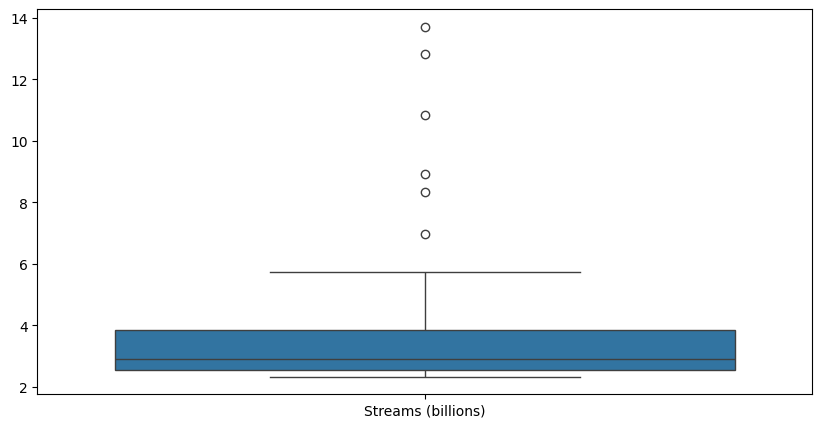

In [18]:
suma_reproducciones_x_artista = df[['Artist(s)','Streams (billions)']].groupby(['Artist(s)']).sum()
suma_reproducciones_x_artista.sort_values(['Streams (billions)'],ascending=False,inplace=True)

plt.figure(figsize=(10,5))
sns.boxplot(suma_reproducciones_x_artista)
plt.show()